# HW0930Q3 CH12Q10

### 10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

##### (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [1]:
import numpy as np

np.random.seed(25)

n_samples = 20
n_features = 50

class_1 = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))
class_2 = np.random.normal(loc=5, scale=1, size=(n_samples, n_features))
class_3 = np.random.normal(loc=10, scale=1, size=(n_samples, n_features))

data = np.vstack([class_1, class_2, class_3])

##### (b) Perform PCA on the 60 observations and plot the frst two principal component score vectors. Use a diferent color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the frst two principal component score vectors.

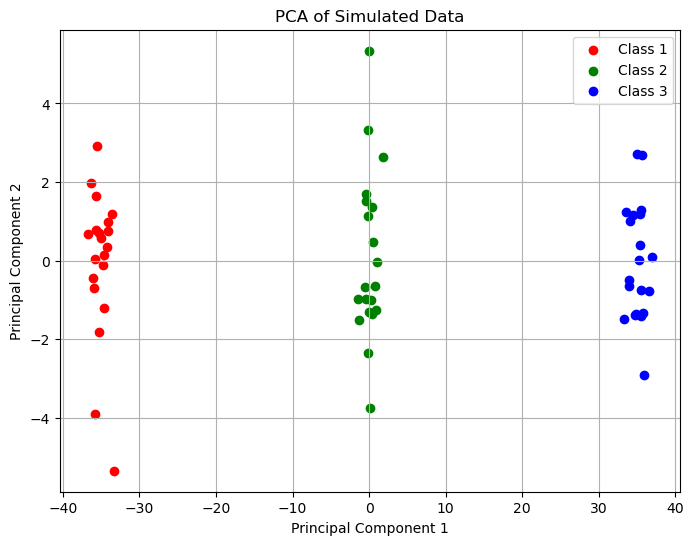

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

plt.figure(figsize=(8, 6))

plt.scatter(pca_result[:n_samples, 0], pca_result[:n_samples, 1], c='r', label='Class 1')
plt.scatter(pca_result[n_samples:2*n_samples, 0], pca_result[n_samples:2*n_samples, 1], c='g', label='Class 2')
plt.scatter(pca_result[2*n_samples:, 0], pca_result[2*n_samples:, 1], c='b', label='Class 3')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Simulated Data')
plt.legend()
plt.grid(True)
plt.show()

##### (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

KMeans Label   0   1   2
True Label              
0              0  20   0
1              0   0  20
2             20   0   0

The K-means clustering labels and the true class labels are exactly the same.


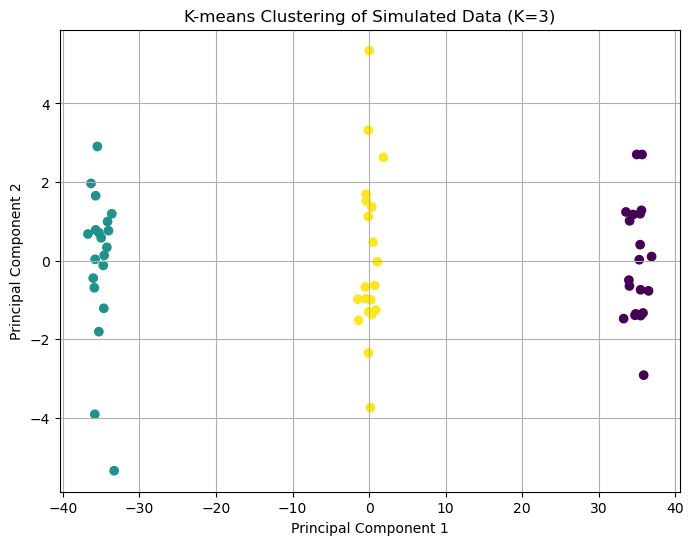

In [3]:
import pandas as pd
from sklearn.cluster import KMeans

true_labels = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)

kmeans = KMeans(n_clusters=3, random_state=25)
kmeans_labels = kmeans.fit_predict(data)

comparison_df = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels})
cross_tab = pd.crosstab(comparison_df['True Label'], comparison_df['KMeans Label'])

print(cross_tab)
print('\nThe K-means clustering labels and the true class labels are exactly the same.')

plt.figure(figsize=(8, 6))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, label='KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Simulated Data (K=3)')
plt.grid(True)
plt.show()

##### (d) Perform K-means clustering with K = 2. Describe your results.

KMeans Label   0   1
True Label          
0              0  20
1             10  10
2             20   0


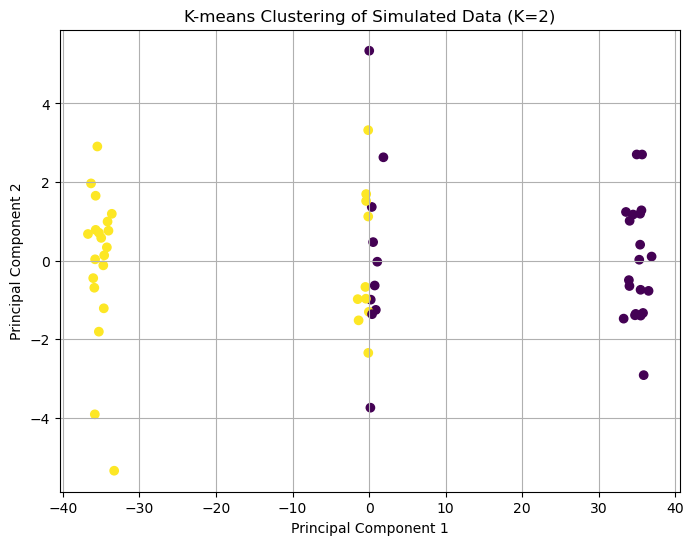


Because we set K to 2, the two distant groups in Principal Component 1 can still be separated into different clusters, 
but the middle group will be split into two clusters due to its distance from the side clusters.


In [4]:
kmeans = KMeans(n_clusters=2, random_state=25)
kmeans_labels = kmeans.fit_predict(data)

comparison_df = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels})
cross_tab = pd.crosstab(comparison_df['True Label'], comparison_df['KMeans Label'])

print(cross_tab)

plt.figure(figsize=(8, 6))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, label='KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Simulated Data (K=2)')
plt.grid(True)
plt.show()

print('\nBecause we set K to 2, the two distant groups in Principal Component 1 can still be separated into different clusters, \nbut the middle group will be split into two clusters due to its distance from the side clusters.')

##### (e) Now perform K-means clustering with K = 4, and describe your results.

KMeans Label   0   1  2   3
True Label                 
0              0  20  0   0
1              0   0  6  14
2             20   0  0   0


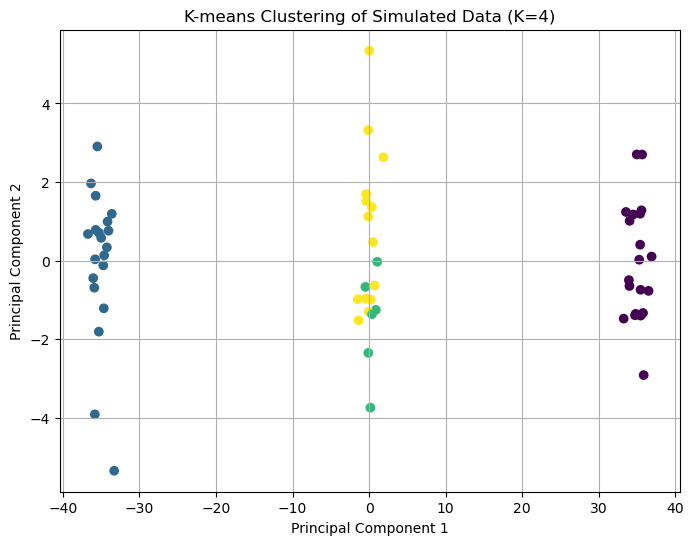


Because we set K to 4, the two distant groups in Principal Component 1 can still be separated into different clusters, 
while the middle group is split into two additional distinct clusters.


In [5]:
kmeans = KMeans(n_clusters=4, random_state=25)
kmeans_labels = kmeans.fit_predict(data)

comparison_df = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels})
cross_tab = pd.crosstab(comparison_df['True Label'], comparison_df['KMeans Label'])

print(cross_tab)

plt.figure(figsize=(8, 6))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, label='KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Simulated Data (K=4)')
plt.grid(True)
plt.show()

print('\nBecause we set K to 4, the two distant groups in Principal Component 1 can still be separated into different clusters, \nwhile the middle group is split into two additional distinct clusters.')

##### (f) Now perform K-means clustering with K = 3 on the frst two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the frst column is the frst principal component score vector, and the second column is the second principal component score vector. Comment on the results.

KMeans Label   0   1   2
True Label              
0              0  20   0
1              0   0  20
2             20   0   0


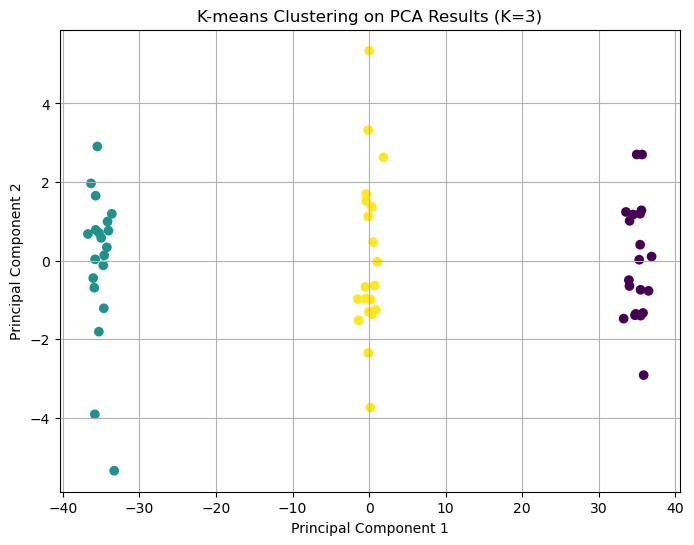

Results with first two principal component score vectors seems to same as with raw data.


In [6]:
kmeans_pca = KMeans(n_clusters=3, random_state=25)
kmeans_labels_pca = kmeans_pca.fit_predict(pca_result)

comparison_df_pca = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels_pca})
cross_tab_pca = pd.crosstab(comparison_df_pca['True Label'], comparison_df_pca['KMeans Label'])

print(cross_tab_pca)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels_pca, cmap='viridis', label='KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA Results (K=3)')
plt.grid(True)
plt.show()

print('Results with first two principal component score vectors seems to same as with raw data.')

##### (g) Using the StandardScaler() estimator, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

KMeans Label   0   1   2
True Label              
0              0  20   0
1              0   0  20
2             20   0   0


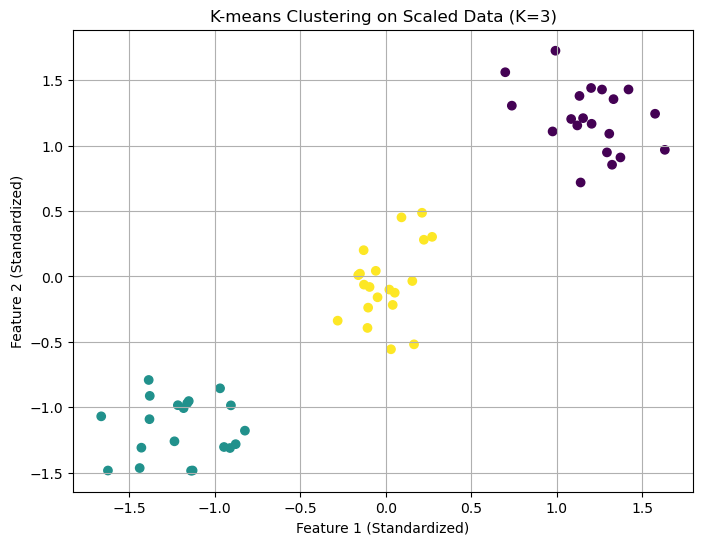

After we standardize the data, the points on the graph are more clustered compared to (b), 
but the classification of each group is consistent with the results from (b).


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


kmeans_scaled = KMeans(n_clusters=3, random_state=25)
kmeans_labels_scaled = kmeans_scaled.fit_predict(data_scaled)

comparison_df_scaled = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels_scaled})
cross_tab_scaled = pd.crosstab(comparison_df_scaled['True Label'], comparison_df_scaled['KMeans Label'])

print(cross_tab_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels_scaled, cmap='viridis', label='KMeans Clusters')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-means Clustering on Scaled Data (K=3)')
plt.grid(True)
plt.show()

print('After we standardize the data, the points on the graph are more clustered compared to (b), \nbut the classification of each group is consistent with the results from (b).')